<a href="https://colab.research.google.com/github/aikokass82-design/home-tasks-/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import sqlalchemy
from google.colab import drive
drive.mount('/content/drive')
engine = sqlalchemy.create_engine("sqlite+pysqlite:////content/drive/MyDrive/Colab Notebooks/appatments.db", echo=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
query = sqlalchemy.text("""
SELECT *
FROM appatments
""")
table_part = pd.read_sql(query, con=engine)
table_part.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,days_exposition
0,3037500.0,61.0,2024-03-10 00:00:00.000000,3,2.50,9,43.6,7,0,6.5,2.0,Kyiv,289.0
1,1996875.0,42.8,2024-05-16 00:00:00.000000,2,2.56,5,27.0,5,0,5.2,1.0,Vyshneve,366.0
2,1828125.0,31.0,2023-09-04 00:00:00.000000,1,2.50,5,19.4,2,0,5.6,1.0,Kyiv,168.0
3,3442500.0,80.0,2023-11-23 00:00:00.000000,3,2.70,27,48.0,11,0,12.0,2.0,Hostomel,74.0
4,2812500.0,58.0,2024-03-04 00:00:00.000000,2,2.75,25,30.0,15,0,11.0,2.0,Irpin,60.0


In [66]:
query = sqlalchemy.text("""
SELECT
locality_name AS LOCATION,
COUNT(*) AS total_sold
FROM appatments
WHERE rooms = 2
AND strftime('%Y', first_day_exposition) = '2023'
GROUP BY locality_name
ORDER BY total_sold DESC;
""")
result = pd.read_sql(query, con=engine)
result

,LOCATION,total_sold
0,Kyiv,414
1,Boryspil,36
2,Vyshneve,34
3,Hostomel,34
4,Irpin,33
5,Brovary,28
6,Boyarka,28
7,Borshchahivka,28
8,Bucha,19


In [67]:
query = sqlalchemy.text("""
SELECT strftime('%Y',first_day_exposition) AS YEAR,
locality_name AS LOCATION,
COUNT (*) AS sales_dynamics
FROM appatments
WHERE rooms = 3
AND locality_name = "Kyiv"
GROUP BY year, location
ORDER BY year;
""")
result = pd.read_sql(query, con=engine)
result

,YEAR,LOCATION,sales_dynamics
0,2021,Kyiv,2
1,2022,Kyiv,23
2,2023,Kyiv,348
3,2024,Kyiv,681


In [68]:
query =( """
SELECT locality_name AS location,
first_day_exposition AS last_listing_date
FROM appatments
ORDER BY first_day_exposition DESC
""")
result = pd.read_sql(query, con=engine)
result

,location,last_listing_date
0,Boryspil,2024-12-23 00:00:00.000000
1,Kyiv,2024-12-23 00:00:00.000000
2,Kyiv,2024-12-22 00:00:00.000000
3,Borshchahivka,2024-12-22 00:00:00.000000
4,Kyiv,2024-12-20 00:00:00.000000
...,...,...
6001,Borshchahivka,2021-08-25 00:00:00.000000
6002,Kyiv,2021-08-21 00:00:00.000000
6003,Boryspil,2021-07-04 00:00:00.000000
6004,Vyshneve,2021-05-26 00:00:00.000000


In [69]:
engine_1 = sqlalchemy.create_engine("sqlite+pysqlite:////content/drive/MyDrive/Colab Notebooks/orders_by_time_and_customers.db", echo=False)
query = sqlalchemy.text("""
SELECT *
FROM orders
""")
orders = pd.read_sql(query, con=engine_1)
orders.head(5)

,InvoiceNo,CustomerID,Description,Quantity,UnitPrice,Category,Discount,PaymentMethod,order_date
0,INV100290,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,USB-C Cable,8,65.59,Accessories,0.22,credit card,2024-11-06 00:00:00.000000
1,INV100278,0d88c95d-0f2f-4e4b-98c4-427c91125f7d,Gaming Keyboard,2,14.44,Gaming,0.07,paypal,2024-02-04 00:00:00.000000
2,INV100561,09c9ad28-738f-4e6c-b61b-6eda53404915,Gaming Keyboard,10,19.09,Gaming,0.24,paypal,2024-01-07 00:00:00.000000
3,INV100542,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,Power Bank,6,6.27,Accessories,0.06,credit card,2024-06-07 00:00:00.000000
4,INV100787,08508316-a3be-4bcd-b6b7-91145174a8ba,Power Bank,2,67.56,Accessories,0.15,credit card,2024-10-06 00:00:00.000000


In [70]:
query = sqlalchemy.text("""
SELECT *
FROM customers
""")
customers = pd.read_sql(query, con=engine_1)
customers.head(5)

,CustomerID,Genre,Age,Annual_Income,Spending_Score,Location
0,002c2626-e984-459b-b96e-f66b9bf1c8d4,Male,19,1500,39,Kyiv
1,0145193c-cf85-436e-92cc-17cb5b0d04eb,Male,21,1500,81,Brovary
2,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,Female,20,1600,6,Kyiv
3,03020226-ebdd-49c3-a545-1d2c01a91620,Female,23,1600,77,Boryspil
4,037f2615-2d98-4d9d-ba88-1aa37263dc0e,Female,31,1700,40,Kyiv


In [71]:
orders_and_customs_pd = orders.merge(
    right=customers,
    how="left",
    left_on="CustomerID",
    right_on="CustomerID"
)
orders_and_customs_pd

,InvoiceNo,CustomerID,Description,Quantity,UnitPrice,Category,Discount,PaymentMethod,order_date,Genre,Age,Annual_Income,Spending_Score,Location
0,INV100290,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,USB-C Cable,8,65.59,Accessories,0.22,credit card,2024-11-06 00:00:00.000000,Female,20,1600,6,Kyiv
1,INV100278,0d88c95d-0f2f-4e4b-98c4-427c91125f7d,Gaming Keyboard,2,14.44,Gaming,0.07,paypal,2024-02-04 00:00:00.000000,Male,52,2300,29,Boryspil
2,INV100561,09c9ad28-738f-4e6c-b61b-6eda53404915,Gaming Keyboard,10,19.09,Gaming,0.24,paypal,2024-01-07 00:00:00.000000,Male,22,2000,79,Kyiv
3,INV100542,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,Power Bank,6,6.27,Accessories,0.06,credit card,2024-06-07 00:00:00.000000,Female,20,1600,6,Kyiv
4,INV100787,08508316-a3be-4bcd-b6b7-91145174a8ba,Power Bank,2,67.56,Accessories,0.15,credit card,2024-10-06 00:00:00.000000,Female,58,2000,15,Irpin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,INV100830,0d88c95d-0f2f-4e4b-98c4-427c91125f7d,Gaming Keyboard,3,15.09,Gaming,0.26,credit card,2024-10-04 00:00:00.000000,Male,52,2300,29,Boryspil
96,INV100204,0f4490c6-673c-4a29-a1fa-59dfebeb7714,Power Bank,8,69.47,Accessories,0.10,paypal,2024-11-02 00:00:00.000000,Male,35,2400,35,Hostomel
97,INV100740,01eac1fb-42ac-4ad4-afd6-fe01d3e2dcf5,Bluetooth Speaker,9,15.25,Electronics,0.08,credit card,2024-11-19 00:00:00.000000,Female,20,1600,6,Kyiv
98,INV100295,09c9ad28-738f-4e6c-b61b-6eda53404915,Laptop Stand,3,74.67,Office,0.17,credit card,2024-06-12 00:00:00.000000,Male,22,2000,79,Kyiv


In [72]:
orders_and_customs_pd.to_sql('orders_and_customs', con=engine_1, if_exists='replace', index=False)

100

In [78]:
query = sqlalchemy.text("""
SELECT
strftime('%Y-%m', order_date) AS year_month,
Location AS LOCATION,
COUNT(*) AS orders_count
FROM orders_and_customs
WHERE strftime('%Y-%m', order_date) = '2024-03'
GROUP BY year_month, Location
ORDER BY orders_count DESC;
""")
result = pd.read_sql(query, con=engine_1)
result

,year_month,LOCATION,orders_count
0,2024-03,Kyiv,4
1,2024-03,Boryspil,1
2,2024-03,Brovary,1


In [80]:
import matplotlib.pyplot as plt
query = sqlalchemy.text("""
SELECT
Location AS LOCATION,
strftime('%Y-%m', order_date) AS year_month,
COUNT(*) as orders_count
FROM orders_and_customs
WHERE Location = "Kyiv"
GROUP BY year_month
ORDER BY year_month;
""")
result = pd.read_sql(query, con=engine_1)
result

,LOCATION,year_month,orders_count
0,Kyiv,2024-01,5
1,Kyiv,2024-02,2
2,Kyiv,2024-03,4
3,Kyiv,2024-04,3
4,Kyiv,2024-05,5
5,Kyiv,2024-06,5
6,Kyiv,2024-07,1
7,Kyiv,2024-08,4
8,Kyiv,2024-10,3
9,Kyiv,2024-11,6


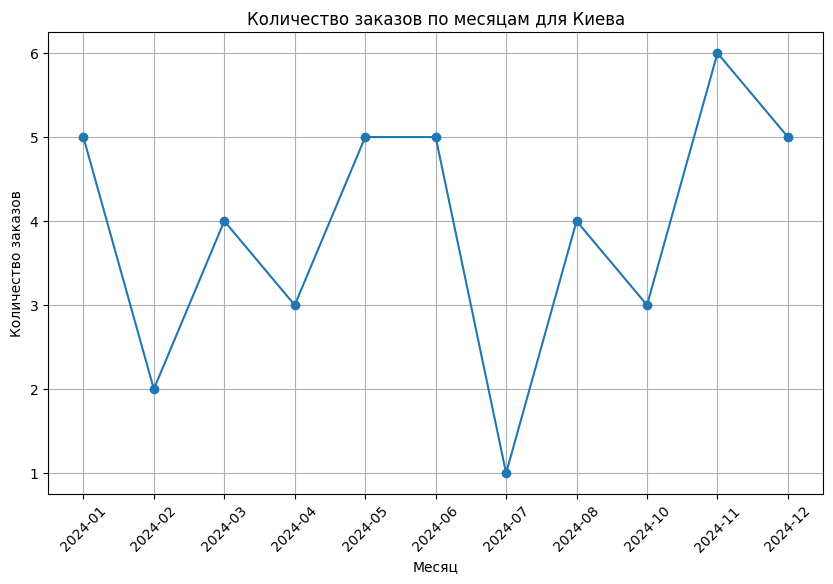

In [81]:
plt.figure(figsize=(10,6))
plt.plot(result['year_month'], result['orders_count'], marker='o')
plt.title('Количество заказов по месяцам для Киева')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [87]:
query = sqlalchemy.text("""
SELECT
Location AS LOCATION,
COUNT(*) AS orders_count
FROM orders_and_customs
WHERE strftime('%Y-%m', order_date) = '2024-08'
AND Description= "Gaming Keyboard"
GROUP BY Location
ORDER BY orders_count DESC;
""")
result = pd.read_sql(query, con=engine_1)
result

,LOCATION,orders_count


In [88]:
query = sqlalchemy.text("""
SELECT COUNT(*)
FROM orders_and_customs
WHERE strftime('%Y-%m', order_date) = '2024-08'
AND Description= "Gaming Keyboard";
""")
pd.read_sql(query, con=engine_1)

,COUNT(*)
0,0


In [89]:
query = sqlalchemy.text("""
SELECT DISTINCT Description
FROM orders_and_customs
WHERE strftime('%Y-%m', order_date) = '2024-08';
""")
pd.read_sql(query, con=engine_1)

,Description
0,Bluetooth Speaker
1,LED Monitor
2,USB-C Cable
3,Wireless Mouse
4,Power Bank


Нет заказов Gaming Keyboard за 2024 году в августе :|